In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls

# Single file

In [ ]:
import librosa
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

In [ ]:
print(x.shape)
print(sr)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=x, rate=sr)

In [ ]:
single_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(single_mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
single_mfcc

# Whole Dataset (1440 files)

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 =

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4

This means the meta data for the audio file is:

Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement "dogs" (02)

1st Repetition (01)

12th Actor (12) - Female (as the actor ID number is even)

In [ ]:
audio = "/content/drive/My Drive/audio/audio_speech_actors_01-24/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

In [ ]:
ls -a

In [ ]:
!find . -name '.DS_Store' -type f -delete

In [2]:
audio = "/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"

actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [3]:
audio

'/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/'

In [4]:
# audio/audio/audio_speech_actors_01-24/Actor_14
# 03-01-02-01-02-01-14.wav

emotion = []
gender = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [5]:
os.listdir(audio + i)

['03-01-03-02-01-02-24.wav',
 '03-01-03-01-02-02-24.wav',
 '03-01-02-02-02-01-24.wav',
 '03-01-02-01-01-01-24.wav',
 '03-01-01-01-01-02-24.wav',
 '03-01-06-01-01-02-24.wav',
 '03-01-05-01-01-01-24.wav',
 '03-01-05-02-02-01-24.wav',
 '03-01-06-02-02-02-24.wav',
 '03-01-04-01-02-02-24.wav',
 '03-01-07-01-02-01-24.wav',
 '03-01-07-02-01-01-24.wav',
 '03-01-04-02-01-02-24.wav',
 '03-01-08-02-01-01-24.wav',
 '03-01-08-01-02-01-24.wav',
 '03-01-05-01-02-02-24.wav',
 '03-01-06-01-02-01-24.wav',
 '03-01-06-02-01-01-24.wav',
 '03-01-05-02-01-02-24.wav',
 '03-01-07-01-01-02-24.wav',
 '03-01-04-01-01-01-24.wav',
 '03-01-04-02-02-01-24.wav',
 '03-01-07-02-02-02-24.wav',
 '03-01-08-02-02-02-24.wav',
 '03-01-08-01-01-02-24.wav',
 '03-01-03-02-02-01-24.wav',
 '03-01-03-01-01-01-24.wav',
 '03-01-02-02-01-02-24.wav',
 '03-01-01-01-02-01-24.wav',
 '03-01-02-01-02-02-24.wav',
 '03-01-04-02-01-01-24.wav',
 '03-01-07-02-01-02-24.wav',
 '03-01-07-01-02-02-24.wav',
 '03-01-04-01-02-01-24.wav',
 '03-01-06-02-

In [6]:
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df
audio_df = pd.concat([pd.DataFrame(gender),audio_df],axis=1)
audio_df.columns = ['gender','emotion']
# audio_df['labels'] =audio_df.gender + '_' + audio_df.emotion
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
# audio_df = audio_df.drop(['gender', 'emotion'], axis=1)
# audio_df.labels.value_counts()
audio_df

# audio_df = pd.DataFrame(emotion)
# audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
# audio_df = pd.concat([pd.DataFrame(gender),audio_df],axis=1)
# audio_df.columns = ['gender','emotion']
# audio_df['labels'] =audio_df.gender + '_' + audio_df.emotion
# audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
# audio_df = audio_df.drop(['gender', 'emotion'], axis=1)
# audio_df.labels.value_counts()

,gender,emotion,path
0,male,surprise,/Users/murielkosaka/Desktop/capstone_project/a...
1,male,surprise,/Users/murielkosaka/Desktop/capstone_project/a...
2,male,angry,/Users/murielkosaka/Desktop/capstone_project/a...
3,male,fear,/Users/murielkosaka/Desktop/capstone_project/a...
4,male,fear,/Users/murielkosaka/Desktop/capstone_project/a...
...,...,...,...
1435,female,fear,/Users/murielkosaka/Desktop/capstone_project/a...
1436,female,fear,/Users/murielkosaka/Desktop/capstone_project/a...
1437,female,angry,/Users/murielkosaka/Desktop/capstone_project/a...
1438,female,surprise,/Users/murielkosaka/Desktop/capstone_project/a...


In [ ]:
audio_df.head()

In [ ]:
audio_df.to_csv('audio.csv')

In [ ]:

os.listdir(audio)

In [ ]:
fname = audio + 'Actor_02/03-01-01-01-01-01-02.wav'  #female neutral
data_neutral, sr_neutral = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(data_neutral, sr=sr_neutral)
ipd.Audio(fname)

In [ ]:
fname = audio + 'Actor_02/03-01-02-01-01-01-02.wav'  #female calm
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(data, sr=sampling_rate)
ipd.Audio(fname)


# MFCC
### The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. MFCC is a good "representation" of the vocal tract that produces the sound. Think of it like an x-ray of your mouth

In [ ]:
fa_mfcc = librosa.feature.mfcc(y=data_neutral, sr=sr_neutral, n_mfcc=13)
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(fa_mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
# MFCC
#The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features 
#(usually about 10–20) which concisely describe the overall shape of a spectral envelope.
# good "representation" of the vocal tract that produces the sound. Think of it like an 
# x-ray of your mouth
mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)

plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar();

In [ ]:
mfcc.shape

In [ ]:
# Male surprised
pathh = audio + 'Actor_09/03-01-08-02-02-02-09.wav'
X, sample_rate = librosa.load(pathh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.spectral_centroid(y=X, sr=sample_rate)
male = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate), axis=0)
print(len(male))

# Female surprised
path= audio + 'Actor_08/03-01-08-02-02-02-08.wav'
X, sample_rate = librosa.load(path,duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.spectral_centroid(y=X, sr=sample_rate)
female = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate), axis=0)
print(len(female))

# Male happy
pathh = audio + 'Actor_09/03-01-03-02-02-02-09.wav'
X, sample_rate = librosa.load(pathh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male1 = librosa.feature.spectral_centroid(y=X, sr=sample_rate)
male1 = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate), axis=0)
print(len(male1))

# Female happy
path= audio + 'Actor_08/03-01-03-02-02-02-08.wav'
X, sample_rate = librosa.load(path,duration=2.5,sr=22050*2,offset=0.5)
female1 = librosa.feature.spectral_centroid(y=X, sr=sample_rate)
female1 = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate), axis=0)
print(len(female1))

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='Female Surprised')
plt.plot(male, label='Male Surprised')
plt.plot(female1, label='Female happy')
plt.plot(male1, label='Male happy')
plt.legend()



In [ ]:
# Male surprised
pathh = audio + 'Actor_09/03-01-08-02-02-02-09.wav'
X, sample_rate = librosa.load(pathh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Female surprised
path= audio + 'Actor_08/03-01-08-02-02-02-08.wav'
X, sample_rate = librosa.load(path,duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='Female Surprised')
plt.plot(male, label='Male Surprised')
plt.legend()



In [ ]:
# Spectrogram - how the audio spectrum varies as a function of time
spectrogram = librosa.feature.melspectrogram(y=X, sr=sampling_rate)
db_spec = librosa.power_to_db(spectrogram, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar();

## Feature Extraction

In [7]:
df = pd.DataFrame(columns=['mfcc_feature','spec_feat','chroma_feat'])

counter=0

for index,path in enumerate(audio_df.path):
    #get wave representation
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
        
    #Mel-frequency cepstral coefficients (MFCCs)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    #temporal averaging
    mfcc=np.mean(mfcc,axis=0)
    
    #get the mel-scaled spectrogram ()
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)  
    #temporally average spectrogram
    spectrogram = np.mean(spectrogram, axis = 0)
    
#     #compute chroma energy (pertains to 12 different pitch classes)
    chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
    #temporally average chroma
    chroma = np.mean(chroma, axis = 0)
    
    # #compute spectral contrast
    # contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
    # contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
    # which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
    # zcr = librosa.feature.zero_crossing_rate(y=X)
    # zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [mfcc, spectrogram,chroma]
    counter=counter+1   

print(len(df))
df.head()

1440


,mfcc_feature,spec_feat,chroma_feat
0,"[-61.862374191339036, -61.862374191339036, -61...","[1.3741229047718469e-09, 1.5239228189166296e-0...","[0.865426322480605, 0.8620605280897284, 0.7588..."
1,"[-61.50800105381538, -61.50800105381538, -61.5...","[0.0, 1.3606633402277747e-11, 6.32103249071507...","[0.0, 0.87482955575437, 0.6967531610081279, 0...."
2,"[-55.66308593160217, -56.17033629546251, -56.1...","[1.2350618281001831e-07, 7.426664085773938e-08...","[0.29114246085998124, 0.314183837229905, 0.401..."
3,"[-63.52352959684379, -63.52352959684379, -63.5...","[2.440053844431309e-09, 2.478540403723405e-09,...","[0.742726209424653, 0.8283234352310779, 0.8610..."
4,"[-43.19739053316282, -44.238600301837614, -43....","[8.924060298953827e-05, 9.056816514606684e-05,...","[0.39732771606750594, 0.38809135998807426, 0.3..."


In [ ]:
# def extract_feature(file_name, mfcc, chroma, mel):
#     with soundfile.SoundFile(file_name) as sound_file:
#         X = sound_file.read(dtype="float32")
#         sample_rate=sound_file.samplerate
#         if chroma:
#             stft=np.abs(librosa.stft(X))
#         result=np.array([])
#         if mfcc:
#             mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
#             result=np.hstack((result, mfccs))
#         if chroma:
#             chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, chroma))
#         if mel:
#             mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, mel))

## CNN

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils, to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM

Using TensorFlow backend.


In [9]:
# SET MEANS TO THEIR OWN COLUMNS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist()),
                         pd.DataFrame(df['chroma_feat'].values.tolist()),
                         pd.DataFrame(df['spec_feat'].values.tolist())
                         ],axis=1)
df_combined = df_combined.fillna(0)

In [10]:
df_combined.drop(columns='gender',inplace=True)

In [11]:
df_combined.head()

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,surprise,/Users/murielkosaka/Desktop/capstone_project/a...,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,...,2.040609e-11,2.028449e-11,3.195879e-11,2.476433e-12,6.167496e-11,1.374700e-10,5.418467e-11,1.486475e-10,1.671580e-10,9.214651e-12
1,surprise,/Users/murielkosaka/Desktop/capstone_project/a...,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,...,1.684405e-10,1.812914e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,angry,/Users/murielkosaka/Desktop/capstone_project/a...,-55.663086,-56.170336,-56.157848,-54.663471,-55.166778,-56.156944,-56.156944,-56.156944,...,5.313996e-11,2.290157e-10,2.298775e-09,6.499785e-09,2.434586e-08,3.582143e-08,8.971266e-09,1.244140e-08,3.891506e-08,2.646189e-08
3,fear,/Users/murielkosaka/Desktop/capstone_project/a...,-63.523530,-63.523530,-63.523530,-63.523530,-63.523530,-63.377373,-61.595853,-63.160227,...,2.531549e-08,1.924894e-08,1.741787e-08,1.225668e-08,7.529888e-09,5.454092e-09,6.819510e-09,1.796941e-08,1.751192e-08,7.574554e-09
4,fear,/Users/murielkosaka/Desktop/capstone_project/a...,-43.197391,-44.238600,-43.996203,-44.132351,-44.267863,-44.346034,-44.142895,-44.255212,...,1.008777e-04,1.028079e-04,9.480856e-05,1.000125e-04,1.159116e-04,9.352593e-05,7.361985e-05,5.787774e-05,4.664970e-05,4.228274e-05


In [ ]:
# SET MEANS TO THEIR OWN COLUMNS

df_combined = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist()),pd.DataFrame(df_chroma['chroma_feat'].values.tolist())],axis=1)
df_combined.head()

In [ ]:
# SET MEANS TO THEIR OWN COLUMNS
df = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist())],axis=1)
df=df.fillna(0)

In [108]:
# TRAIN TEST SPLIT
X_model, X_test, y_model, y_test = train_test_split(df_combined.drop(['path','emotion'],axis=1)
                                                    , df_combined.emotion
                                                    , test_size=0.25
                                                    , shuffle=False
                                                    , random_state=42
                                                   )
# TRAIN TEST SPLIT
X_train, X_validation, y_train, y_validation = train_test_split(X_model
                                                    , y_model
                                                    , test_size=0.25
                                                    , shuffle=False
                                                    , random_state=42
                                                   )



In [109]:
X_model.shape

(1080, 777)

In [110]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_validation = (X_validation - mean) / std


# Check the dataset now 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
150,1.917169,1.704300,1.672550,1.675489,1.656232,2.262432,2.910901,3.147847,2.827170,2.732265,...,-0.061413,-0.060146,-0.064271,-0.070757,-0.070281,-0.065975,-0.061132,-0.062093,-0.063122,-0.060667
151,-0.192184,-0.209268,-0.270006,-0.256742,-0.099416,-0.139157,-0.241373,-0.269044,-0.296729,-0.304317,...,-0.074084,-0.064673,-0.066763,-0.071866,-0.071779,-0.067007,-0.061977,-0.063214,-0.064142,-0.061276
152,-0.090917,-0.085589,-0.226673,-0.346127,-0.209036,-0.049570,-0.074190,-0.206553,-0.275681,-0.384059,...,-0.074030,-0.064644,-0.066670,-0.071666,-0.071481,-0.066714,-0.061751,-0.063047,-0.064055,-0.061208
153,-0.481234,-0.511354,-0.515646,-0.512139,-0.513551,-0.516447,-0.509125,-0.507154,-0.522586,-0.524296,...,-0.069145,-0.061220,-0.064519,-0.070642,-0.071192,-0.066713,-0.061826,-0.063126,-0.064096,-0.061270
154,-1.009212,-1.050670,-1.055332,-1.055114,-1.051666,-1.051968,-1.034473,-1.029634,-1.048507,-1.048195,...,-0.074115,-0.064699,-0.066790,-0.071895,-0.071799,-0.067021,-0.061984,-0.063217,-0.064145,-0.061283
155,-0.266009,-0.298659,-0.316131,-0.300427,-0.222237,-0.201441,-0.303202,-0.299580,-0.307440,-0.314071,...,-0.074115,-0.064699,-0.066791,-0.071894,-0.071794,-0.067007,-0.061958,-0.063194,-0.064114,-0.061226
156,0.041708,0.042638,0.033332,-0.020347,0.011348,0.091424,0.095574,0.073172,0.084601,0.026654,...,-0.074040,-0.064654,-0.066764,-0.071872,-0.071779,-0.067013,-0.061979,-0.063215,-0.064144,-0.061282
157,1.783900,1.722382,1.682446,1.663899,1.678105,1.712977,1.740922,1.662939,1.714026,1.699326,...,1.637121,0.974559,1.311964,1.582403,1.188109,0.262462,0.026983,-0.010164,-0.026542,-0.035135
158,3.982296,3.828273,3.771321,4.016920,4.212882,4.370211,4.288126,3.776092,3.572037,3.789169,...,-0.074117,-0.064701,-0.066792,-0.071897,-0.071800,-0.067022,-0.061985,-0.063219,-0.064147,-0.061284
159,-1.366860,-1.384745,-1.399795,-1.393605,-1.292804,-1.348363,-1.386379,-1.379619,-1.400797,-1.399131,...,-0.074104,-0.064690,-0.066778,-0.071880,-0.071789,-0.067010,-0.061972,-0.063207,-0.064138,-0.061272


In [111]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_validation=np.array(X_validation)
y_validation=np.array(y_validation)

In [112]:
y_validation

array(['happy', 'happy', 'calm', 'calm', 'neutral', 'surprise',
       'surprise', 'fear', 'angry', 'angry', 'fear', 'sad', 'disgust',
       'disgust', 'sad', 'surprise', 'surprise', 'angry', 'fear', 'fear',
       'angry', 'disgust', 'sad', 'sad', 'disgust', 'happy', 'happy',
       'calm', 'neutral', 'calm', 'surprise', 'surprise', 'fear', 'angry',
       'angry', 'fear', 'sad', 'disgust', 'disgust', 'sad', 'happy',
       'happy', 'calm', 'calm', 'neutral', 'happy', 'happy', 'calm',
       'neutral', 'calm', 'surprise', 'surprise', 'angry', 'fear', 'fear',
       'angry', 'disgust', 'sad', 'sad', 'disgust', 'neutral', 'calm',
       'calm', 'happy', 'happy', 'surprise', 'surprise', 'sad', 'disgust',
       'disgust', 'sad', 'fear', 'angry', 'angry', 'fear', 'surprise',
       'surprise', 'disgust', 'sad', 'sad', 'disgust', 'angry', 'fear',
       'fear', 'angry', 'calm', 'neutral', 'calm', 'happy', 'happy',
       'angry', 'fear', 'fear', 'angry', 'disgust', 'sad', 'sad',
       'd

In [113]:
len(y_test)

360

In [114]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
y_validation = to_categorical(lb.fit_transform(y_validation))


print(y_train[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


In [115]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [116]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [117]:
#time series data requires kernel sliding in only one dimension and have spatial properties: 1d CNN
# reshape data to 3d tensor
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
X_validation = X_validation[:,:,np.newaxis]

X_validation.shape

(270, 777, 1)

In [118]:
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM

#BUILD CNN MODEL
model = Sequential()
model.add(Conv1D(32, kernel_size=(4), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=(4), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Conv1D(64, kernel_size=(4), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Conv1D(128, kernel_size=(4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Conv1D(128, kernel_size=(4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128, kernel_size=(4), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128, kernel_size=(4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Conv1D(256, kernel_size=(4), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='softmax'))
model.summary()
opt = keras.optimizers.Adam(lr=0.0001)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4319 (Conv1D)         (None, 774, 32)           160       
_________________________________________________________________
conv1d_4320 (Conv1D)         (None, 771, 64)           8256      
_________________________________________________________________
max_pooling1d_3458 (MaxPooli (None, 385, 64)           0         
_________________________________________________________________
dropout_3458 (Dropout)       (None, 385, 64)           0         
_________________________________________________________________
conv1d_4321 (Conv1D)         (None, 382, 64)           16448     
_________________________________________________________________
max_pooling1d_3459 (MaxPooli (None, 191, 64)           0         
_________________________________________________________________
dropout_3459 (Dropout)       (None, 191, 64)           0         
__________

In [119]:
val_loss_thresh = 4.00

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_loss') > val_loss_thresh):   
          print("\nWe have reached %2.2f%% val_loss, so we will stopping training.")   
        self.model.stop_training = True
callbacks = myCallback()


In [ ]:
# FIT MODEL
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train,batch_size=32, epochs=50, validation_data=(X_validation, y_validation),callbacks=[callbacks])

Train on 810 samples, validate on 270 samples
Epoch 1/50


In [65]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

360/360 [==============================] - 1s 3ms/step
Loss of the model is -  1.7312950876024034
360/360 [==============================] - 1s 3ms/step
Accuracy of the model is -  39.44444444444444 %


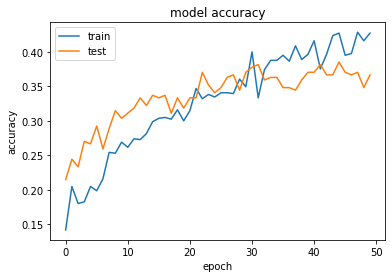

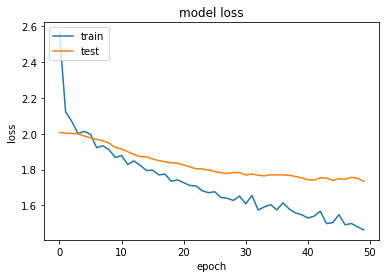

In [66]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# 50 epoch
# val_accuracy = .3972 mfcc
    # .3722 mfcc
# val_accuracy = 0.2139 chroma
# val_accuracy = 0.0639 mfcc + chroma
# 50 epoch - changed random_state
# val_accuracy

In [98]:
# TRAIN TEST SPLIT
X_model, X_test, y_model, y_test = train_test_split(df_combined.drop(['path','emotion'],axis=1)
                                                    , df_combined.emotion
                                                    , test_size=0.25
                                                    , shuffle=False
                                                    , random_state=42
                                                   )
# TRAIN TEST SPLIT
X_train, X_validation, y_train, y_validation = train_test_split(X_model
                                                    , y_model
                                                    , test_size=0.25
                                                    , shuffle=False
                                                    , random_state=42
                                                   )




In [99]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_validation = (X_validation - mean) / std




In [100]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_validation=np.array(X_validation)
y_validation=np.array(y_validation)

In [101]:
#time series data requires kernel sliding in only one dimension and have spatial properties: 1d CNN
# reshape data to 3d tensor
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
X_validation = X_validation[:,:,np.newaxis]

X_validation.shape

(270, 777, 1)

In [102]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def make_classifier(optimizer='adam'):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=(3), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(64, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(128, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(128, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))   
    model.compile(loss='categorical_crossentropy', optimizer= 'adam',metrics=['accuracy'])
    return model

In [107]:
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size':[20,40],
    'nb_epoch':[10,15],
    'optimizer':['adam','rmsprop']
}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)
grid_search = grid_search.fit(X_train,y_train)
best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/1
648/648 [==============================] - 89s 137ms/step - loss: 1.9991 - acc: 0.2160
Epoch 1/1
648/648 [==============================] - 69s 106ms/step - loss: 1.9712 - acc: 0.2176
Epoch 1/1
648/648 [==============================] - 66s 101ms/step - loss: 1.9790 - acc: 0.2083
Epoch 1/1
648/648 [==============================] - 66s 101ms/step - loss: 1.9515 - acc: 0.2068
Epoch 1/1
648/648 [==============================] - 68s 105ms/step - loss: 1.9779 - acc: 0.2407
Epoch 1/1
648/648 [==============================] - 92s 142ms/step - loss: 1.9671 - acc: 0.2207
Epoch 1/1
648/648 [==============================] - 61s 94ms/step - loss: 1.9790 - acc: 0.2052
Epoch 1/1
648/648 [==============================] - 74s 114ms/step - loss: 1.9980 - acc: 0.1929
Epoch 1/1
648/648 [==============================] - 94s 145ms/step - loss: 1.9580 - acc: 0.2083
Epoch 1/1
648/648 [==============================] - 69s 107ms/step - loss: 1.9791 - acc: 0.2130
Epoch 1/1
648/648 [============

KeyboardInterrupt: 

In [ ]:
# ranfom forest on MFCC features
rfc_mfcc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2,n_jobs=-1, random_state=42)
rfc_mfcc.fit(X_train,Y_train)

## MLP Classifier

In [87]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score




In [ ]:
# Extract the mean bands to its own feature columns
df = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist())],axis=1)
df=df.fillna(0)

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=22
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

In [88]:
model=MLPClassifier(alpha=0.01, batch_size=216,epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
#DataFlair - Calculate the accuracy of our model
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

## RFC

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=22
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

In [ ]:
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring=’roc_auc’)


In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = [‘auto’, ‘sqrt’]

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 ‘n_estimators’: n_estimators,
 ‘max_features’: max_features,
 ‘max_depth’: max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

In [ ]:
#preparing data
train_data = pd.DataFrame()
train_data['fname'] = train['fname']
test_data = pd.DataFrame()
test_data['fname'] = audio_test_files

train_data = train_data['fname'].apply(get_mfcc, path='../input/audio_train/')
print('done loading train mfcc')
test_data = test_data['fname'].apply(get_mfcc, path='../input/audio_test/')
print('done loading test mfcc')

train_data['label'] = train['label']
test_data['label'] = np.zeros((len(audio_test_files)))